<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>
 
<b>Group_ID: <code>3</code><b>
 
<b>Group Members:</b>  
 
1. Sujahid Basha B00925849
2. Hariesh Annadevara Sivakumar B00965733
3. Venkatraman M B00968227 
4. Shubhangi Mahato B00975934

# 1. Dataset Information 

<h4> Dataset Name: <code> UCI Obesity Dataset</code></h4>
<h4> Link to the Dataset: http://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition </h4>
<h4> Dataset Description: </h4>
<code> This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform. </code>


# 2. Task Information 

<h4> Task Goal: <code> "Exploring ML Models for Multi-Class Obesity Prediction with Insights from Visualizations. </code></h4>
<h4> Task Description: </h4>
The task involves implementing and optimizing machine learning models, including Random Forest, SVM, Naive Bayes, and Logistic Regression, for multi-class classification to predict obesity categories. The goal is to achieve accurate predictions through hyperparameter tuning, visualizations like confusion matrices and ROC curves, and gain insights into feature relationships, contributing to effective obesity prediction.

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.linear_model import LogisticRegression



In [4]:
df = pd.read_csv('obesity_dataset.csv')
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
obesity_data = df
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])
obesity_lab = obesity_data[["NObeyesdad"]]
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [6]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)
obesity_features = obesity_features.astype("float")
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH2O                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [7]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)
encoder = LabelEncoder()
encoder.fit(obesity_label)
list(encoder.classes_)
obesity_labels_encoded = encoder.transform(obesity_label)

### 3.2 Model development and training 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(obesity_features, obesity_labels_encoded, test_size=0.2, stratify = obesity_labels_encoded, random_state=42)


In [9]:
#Random Forest with GRID SEARCH for best parameters
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=47)
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and model
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)



In [10]:
# Support Vector Machine (SVM)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Get the best parameters and model
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Best Parameters: {svm_best_params}")
print(f"SVM Accuracy: {svm_accuracy}")



SVM Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
SVM Accuracy: 0.9479905437352246


In [11]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")



Naive Bayes Accuracy: 0.5390070921985816


In [12]:
# Logistic Regression (for multi-class problems)
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")



Logistic Regression Accuracy: 0.8203309692671394


### 3.3 Model evaluation

Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.9432624113475178


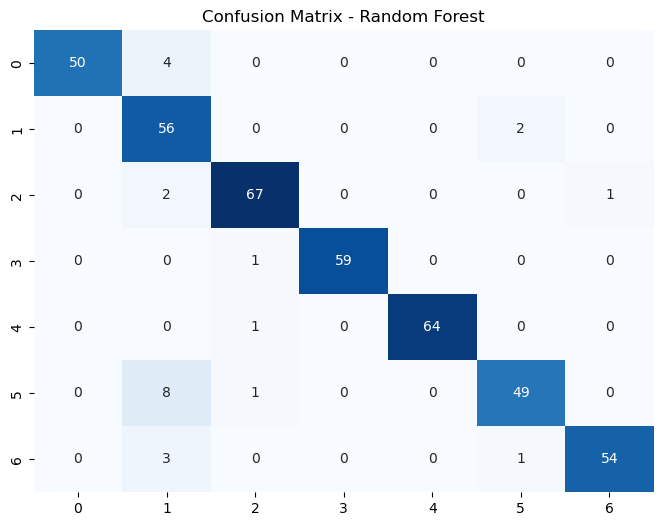

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.77      0.97      0.85        58
           2       0.96      0.96      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.94      0.84      0.89        58
           6       0.98      0.93      0.96        58

    accuracy                           0.94       423
   macro avg       0.95      0.94      0.94       423
weighted avg       0.95      0.94      0.94       423



In [13]:
print(f"Random Forest Best Parameters: {rf_best_params}")
print(f"Random Forest Accuracy: {rf_accuracy}")

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report for Random Forest
print("Classification Report - Random Forest:")
print(classification_report(y_test, rf_predictions))

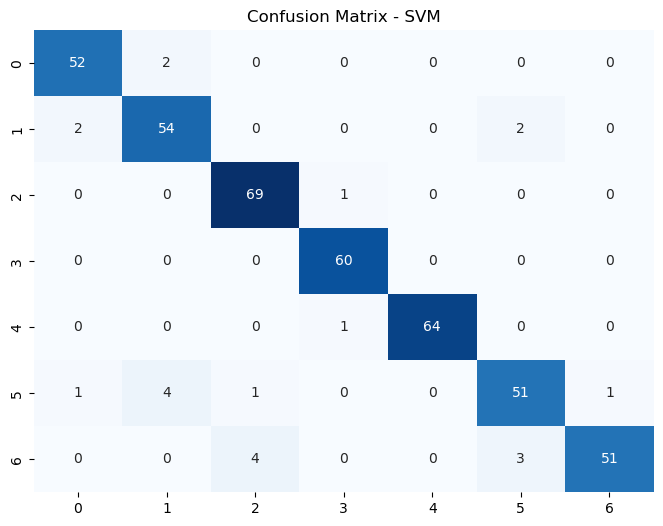

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.90      0.93      0.92        58
           2       0.93      0.99      0.96        70
           3       0.97      1.00      0.98        60
           4       1.00      0.98      0.99        65
           5       0.91      0.88      0.89        58
           6       0.98      0.88      0.93        58

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



In [14]:
# Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.show()

# Classification Report for SVM
print("Classification Report - SVM:")
print(classification_report(y_test, svm_predictions))

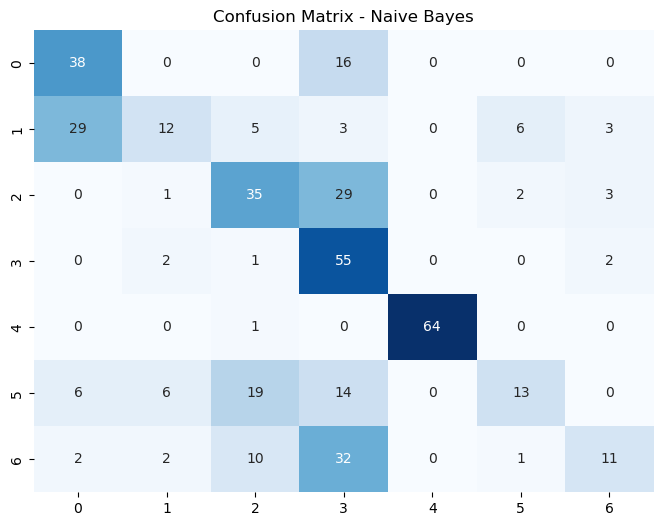

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59        54
           1       0.52      0.21      0.30        58
           2       0.49      0.50      0.50        70
           3       0.37      0.92      0.53        60
           4       1.00      0.98      0.99        65
           5       0.59      0.22      0.32        58
           6       0.58      0.19      0.29        58

    accuracy                           0.54       423
   macro avg       0.58      0.53      0.50       423
weighted avg       0.58      0.54      0.51       423



In [15]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

# Classification Report for Naive Bayes
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, nb_predictions))

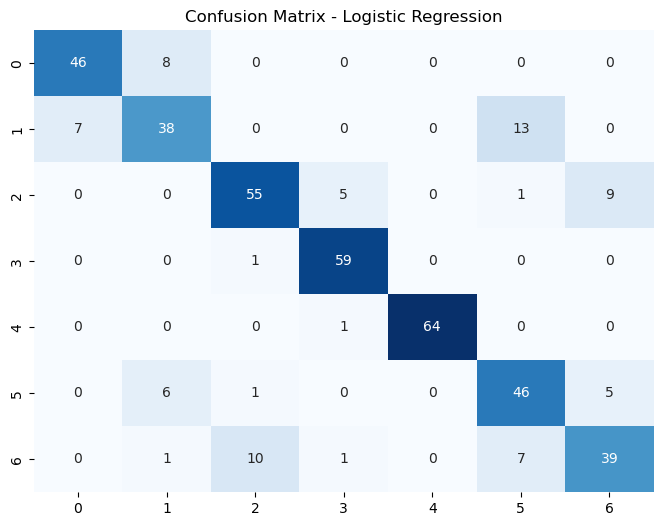

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        54
           1       0.72      0.66      0.68        58
           2       0.82      0.79      0.80        70
           3       0.89      0.98      0.94        60
           4       1.00      0.98      0.99        65
           5       0.69      0.79      0.74        58
           6       0.74      0.67      0.70        58

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.82       423
weighted avg       0.82      0.82      0.82       423



In [16]:
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report for Logistic Regression
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, lr_predictions))

### 3.4 Analysis 

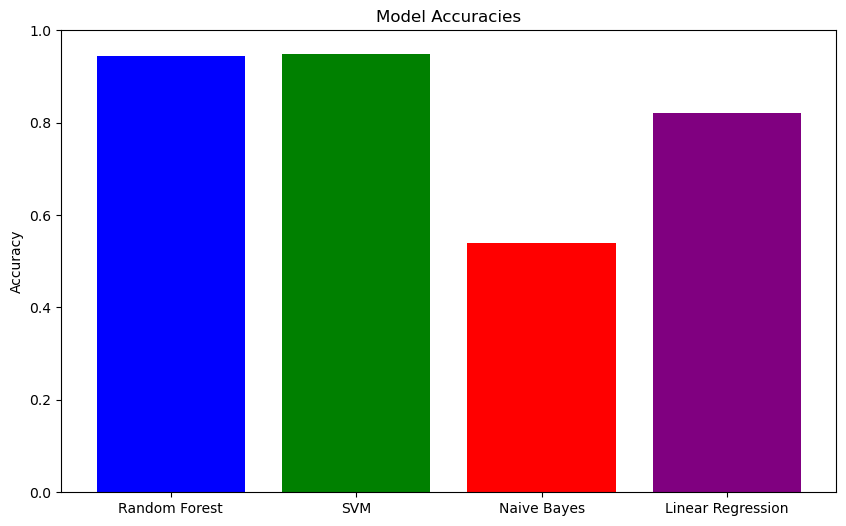

In [17]:
# Store model names and accuracies
model_names = ['Random Forest', 'SVM', 'Naive Bayes', 'Linear Regression']
accuracies = [rf_accuracy, svm_accuracy, nb_accuracy, lr_accuracy]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

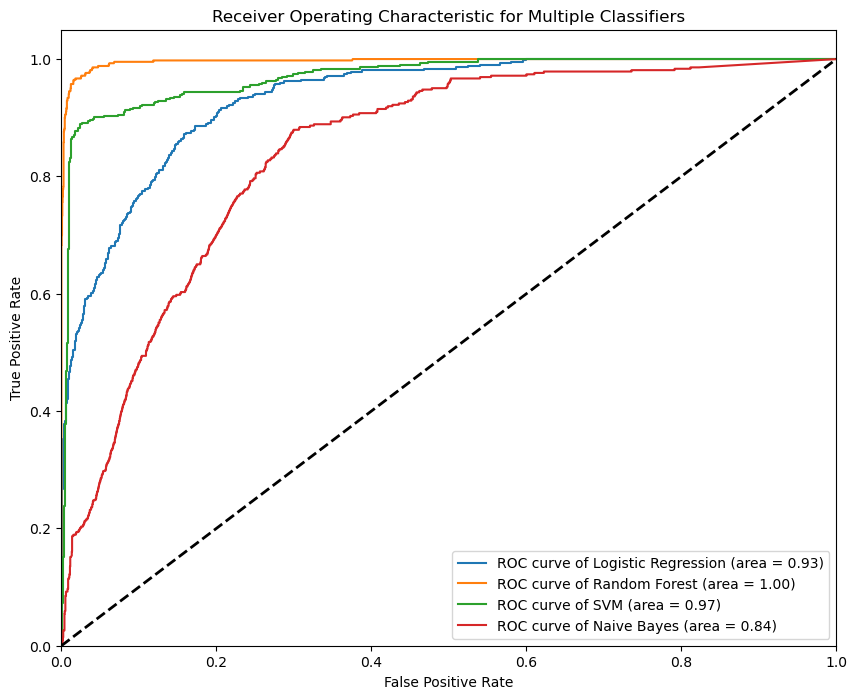

In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
Y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = Y_test_bin.shape[1]
classifiers = {
'Logistic Regression': lr_model,
'Random Forest': rf_best_model,
'SVM': svm_best_model,
'Naive Bayes': nb_model
}
plt.figure(figsize=(10, 8))
for (name, classifier) in classifiers.items():
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(X_train, y_train)

    try:
        Y_score = classifier.decision_function(X_test)
    except AttributeError:
        Y_score = classifier.predict_proba(X_test)
    Y_test_bin = np.nan_to_num(Y_test_bin, nan=np.nanmean(Y_test_bin))
    Y_score = np.nan_to_num(Y_score, nan=np.nanmean(Y_score))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_bin.ravel(), Y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.plot(fpr["micro"], tpr["micro"],
    label='ROC curve of {0} (area = {1:0.2f})'
    ''.format(name, roc_auc["micro"]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiple Classifiers')
plt.legend(loc="lower right")
plt.show()

The performance analysis of each model based on the provided accuracy scores reveals distinct characteristics:
Naive Bayes (NB):
       Accuracy: 54%
       Analysis: The Naive Bayes model achieved a relatively lower accuracy compared to other models. This might be attributed to its assumption of feature independence, which might not hold well in the given dataset with potentially complex relationships between features.

Support Vector Machine (SVM):
       Accuracy: 94.7%
       Analysis: SVM demonstrates strong performance with an accuracy of 94.7%, indicating its effectiveness in capturing complex decision boundaries. This model is robust in handling both binary and multi-class classification tasks.

Random Forest (RF):
       Accuracy: 94.3%
       Analysis: Random Forest exhibits high accuracy, leveraging ensemble learning to mitigate overfitting and capture intricate patterns in the data. It performs competitively with SVM, showcasing its versatility in various scenarios.

Logistic Regression (LR):
       Accuracy: 83%
       Analysis: Logistic Regression, while achieving a respectable accuracy of 83%, lags behind SVM and Random Forest. This could be due to its linear nature, which may struggle to capture non-linear relationships present in the data.

Overall Impression:
SVM and Random Forest models outperform Naive Bayes and Logistic Regression in accuracy.
    SVM stands out as the top performer, indicating its suitability for this particular multi-class classification task.
    Naive Bayes may benefit from additional feature engineering or model refinement to capture more complex relationships.
    The choice of the most suitable model depends on the specific goals and requirements of the obesity prediction task